# Building Phylogeny

First we import the Trisicell pakcage as:

In [1]:
import trisicell as tsc
tsc.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)

In [2]:
genotype = tsc.datasets.example('genotype')
expression = tsc.datasets.example('expression')

In [3]:
print(genotype)

AnnData object with n_obs × n_vars = 83 × 450
    obs: 'cells', 'uniquely_mapped_percent', 'num_splices', 'num_GCAG_splices', 'insertion_length', 'deletion_length', 'unmapped_tooshort_percent', 'avg_mapped_read_length', 'deletion_rate', 'mismatch_rate', 'avg_input_read_length', 'num_ATAC_splices', 'num_annotated_splices', 'num_GTAG_splices', 'uniquely_mapped', 'multimapped_toomany', 'unmapped_mismatches', 'unmapped_mismatches_percent', 'total_reads', 'unmapped_other', 'insertion_rate', 'unmapped_other_percent', 'multimapped_percent', 'multimapped', 'num_noncanonical_splices', 'unmapped_tooshort', 'multimapped_toomany_percent', 'clone', 'group', 'group_color', 'is_red', 'is_sub', 'subclone_color', 'n_expressed', 'Axl', 'Erbb3', 'Mitf', 'MPS_overall', 'branch_color'
    var: 'kind', 'amino_acid_change', 'ensemble', 'gene', 'chrom', 'position', 'reference', 'alteration'
    layers: 'genotype', 'mutant', 'total', 'vaf'


Here is the information about the cells:

In [4]:
genotype.obs.head()

,cells,uniquely_mapped_percent,num_splices,num_GCAG_splices,insertion_length,deletion_length,unmapped_tooshort_percent,avg_mapped_read_length,deletion_rate,mismatch_rate,...,group_color,is_red,is_sub,subclone_color,n_expressed,Axl,Erbb3,Mitf,MPS_overall,branch_color
subclone,,,,,,,,,,,,,,,,,,,,,
C15_1,109_P02_A03,83.04,4304604,44708,1.19,1.93,10.22,196.08,0.01,1.09,...,#D92347,0,0,#B9D7ED,7644,6.328047,0.000000,0.000000,-0.727720,#E11F27
C15_2,110_P02_B03,85.67,4501087,46731,1.22,1.79,7.97,197.43,0.01,0.90,...,#D92347,0,0,#B9D7ED,7504,6.978424,3.604071,4.066950,0.170112,#E11F27
C15_3,111_P02_C03,79.49,2830734,32048,1.24,1.69,14.55,195.28,0.01,0.98,...,#D92347,0,0,#B9D7ED,6433,7.418106,5.479295,5.460087,-1.207896,#E11F27
C15_4,112_P02_D03,79.78,2601346,29242,1.22,1.64,14.25,194.63,0.01,0.95,...,#D92347,0,0,#B9D7ED,6765,8.461807,4.725196,2.711495,-2.571793,#E11F27
C15_5,113_P02_E03,81.62,2864957,33108,1.22,1.68,12.50,195.43,0.01,1.07,...,#D92347,0,0,#B9D7ED,7769,6.884476,6.314334,0.000000,-0.620660,#E11F27


Here is the information about the mutations:

In [5]:
genotype.var.head()

,kind,amino_acid_change,ensemble,gene,chrom,position,reference,alteration
muts,,,,,,,,
ENSMUSG00000000088.7_Cox5a.chr9.57530249.A.T,nonsynonymous SNV,"Cox5a:ENSMUST00000000090.7:exon3:c.A214T:p.T72S,",ENSMUSG00000000088.7,Cox5a,chr9,57530249,A,T
ENSMUSG00000000538.18_Tom1l2.chr11.60258874.A.T,synonymous SNV,Tom1l2:ENSMUST00000093048.12:exon6:c.T624A:p.S...,ENSMUSG00000000538.18,Tom1l2,chr11,60258874,A,T
ENSMUSG00000000751.13_Rpa1.chr11.75301326.C.T,synonymous SNV,Rpa1:ENSMUST00000000767.5:exon18:c.G1914A:p.A6...,ENSMUSG00000000751.13,Rpa1,chr11,75301326,C,T
ENSMUSG00000000751.13_Rpa1.chr11.75310233.A.G,nonsynonymous SNV,Rpa1:ENSMUST00000092907.11:exon13:c.T1301C:p.V...,ENSMUSG00000000751.13,Rpa1,chr11,75310233,A,G
ENSMUSG00000000827.18_Tpd52l2.chr2.181502923.C.T,nonsynonymous SNV,Tpd52l2:ENSMUST00000000844.14:exon4:c.C362T:p....,ENSMUSG00000000827.18,Tpd52l2,chr2,181502923,C,T


In [6]:
print(expression)

AnnData object with n_obs × n_vars = 83 × 6717
    obs: 'cells', 'uniquely_mapped_percent', 'num_splices', 'num_GCAG_splices', 'insertion_length', 'deletion_length', 'unmapped_tooshort_percent', 'avg_mapped_read_length', 'deletion_rate', 'mismatch_rate', 'avg_input_read_length', 'num_ATAC_splices', 'num_annotated_splices', 'num_GTAG_splices', 'uniquely_mapped', 'multimapped_toomany', 'unmapped_mismatches', 'unmapped_mismatches_percent', 'total_reads', 'unmapped_other', 'insertion_rate', 'unmapped_other_percent', 'multimapped_percent', 'multimapped', 'num_noncanonical_splices', 'unmapped_tooshort', 'multimapped_toomany_percent', 'clone', 'group', 'group_color', 'is_red', 'is_sub', 'subclone_color', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'neig

Now we will do some filteration to remove artifacts.

In [7]:
tsc.pp.filter_mut_vaf_greater_than_coverage_mutant_greater_than(genotype, min_vaf=0.4,
                                                                min_coverage_mutant=20, min_cells=2)
tsc.pp.filter_mut_reference_must_present_in_at_least(genotype, min_cells=1)
tsc.pp.filter_mut_mutant_must_present_in_at_least(genotype, min_cells=2)

Matrix with n_obs × n_vars = 83 × 269
Matrix with n_obs × n_vars = 83 × 268
Matrix with n_obs × n_vars = 83 × 268


In [8]:
tsc.pp.build_scmatrix(genotype)
df_in = genotype.to_df()

In [9]:
df_out = tsc.tl.scistree(df_in, alpha=0.001, beta=0.2)

running ScisTree with alpha=0.001, beta=0.2
input -- size: 83x268
input -- 0: 9990#, 44.9%
input -- 1: 4037#, 18.1%
input -- NA: 8217#, 36.9%
input -- CF: False
output -- size: 83x268
output -- 0: 11375#, 51.1%
output -- 1: 10869#, 48.9%
output -- NA: 0#, 0.0%
output -- CF: True
output -- time: 61.8s (0:01:01.757287)
flips -- #0->1: 1903
flips -- #1->0: 17
flips -- #NA->0: 3271
flips -- #NA->1: 4946
rates -- FN: 0.321
rates -- FP: 0.00209773
rates -- NA: 0.369
score -- NLL: 4085.320309585965


In [10]:
tree = tsc.ul.to_tree(df_out)

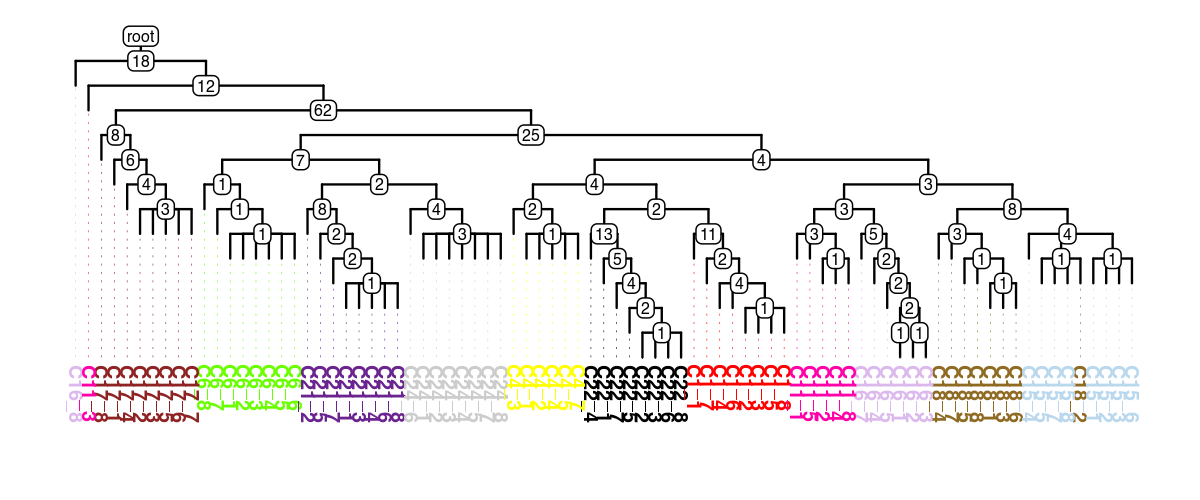

In [11]:
tsc.pl.dendro_tree(tree, cell_info=genotype.obs, label_color='subclone_color', width=1200, height=500, dpi=200)